In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import random
font = cv2.FONT_HERSHEY_SIMPLEX


def display_img(img):
    fig = plt.figure(figsize=(40,20))
    ax = fig.add_subplot(111)
    ax.imshow(img)

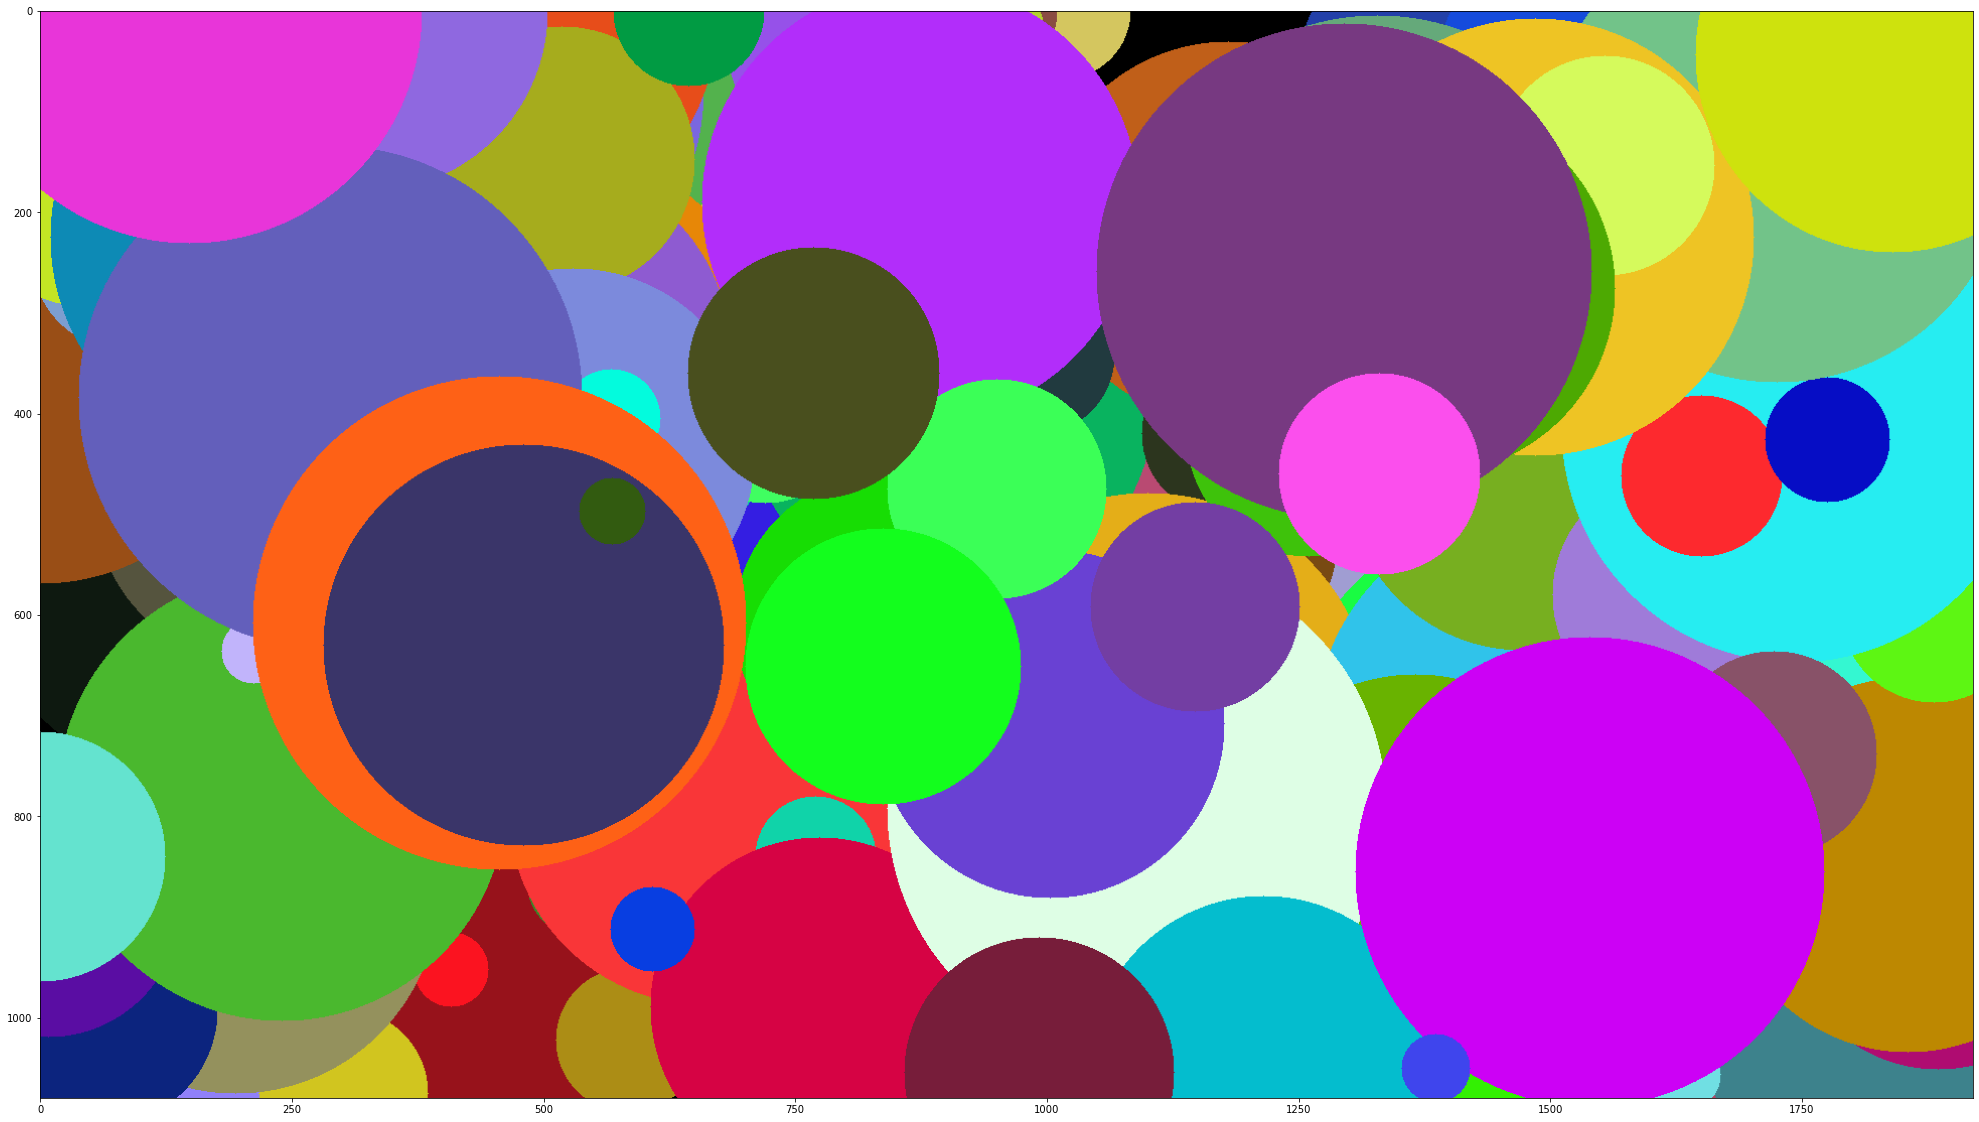

In [3]:
blank = np.zeros((1080, 1920), dtype = np.uint8)
blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)

for i in range(200):
    
    color1 = random.randint(0,255)
    color2 = random.randint(0,255)
    color3 = random.randint(0,255)
    
    minRadius = 32
    radius = random.randint(minRadius,250)
    angle = random.randint(0,360)
    
    lenght = blank.shape[1]
    width = blank.shape[0]
    step = random.randint(1,100)
    center = (random.randrange(0,lenght,step),(random.randrange(0,width,step)))

    
    cv2.circle(blank, (random.randrange(0,lenght,step),(random.randrange(0,width,step))), radius = radius, color = (color1, color2, color3), thickness = -1)
    
display_img(blank)

In [4]:
blured = cv2.GaussianBlur(blank, (147,147), sigmaX = 0)

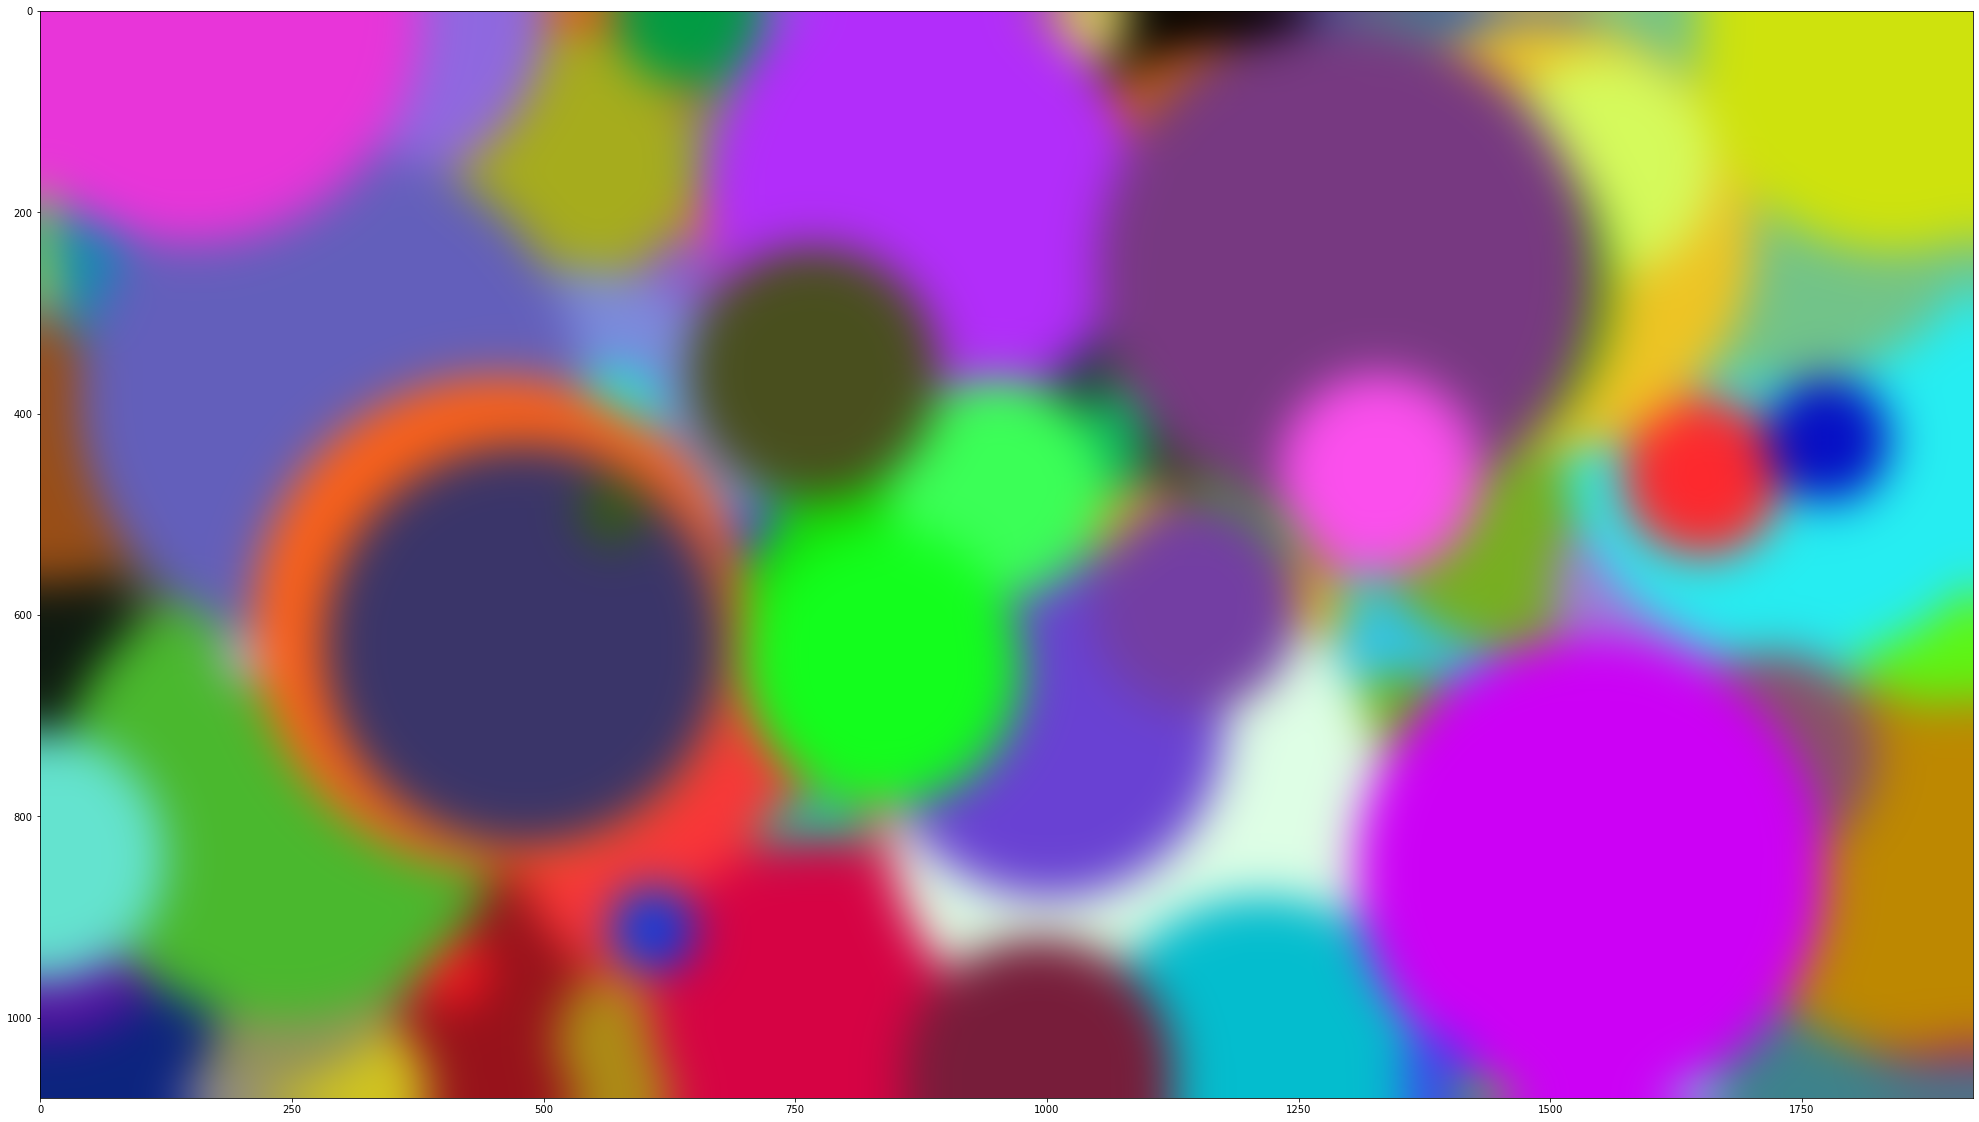

In [5]:
display_img(blured)

In [6]:
def drawSphere(img, center, radius, colorSphere, angle):
    dobra = 7
    lines = 3
    limit = 100
    _lines = int(((1/lines)*limit)/2)

    cv2.circle(img, center = (center), radius = radius, color = colorSphere, thickness = -1)

    cv2.ellipse(img, (center), axes = (radius, dobra*5), angle = angle + 90,
                startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 1)

    cv2.ellipse(img, (center), axes = (radius, radius), angle = angle + 90,
                startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 1)

    for i in range(-limit +10, limit, _lines + 10):

        delta_cos = int(((i/100)*radius)*np.cos(angle*np.pi/180))
        delta_sin = int(((i/100)*radius)*np.sin(angle*np.pi/180))

        r_cos = np.sqrt((radius**2)-(delta_cos**2)-(delta_sin**2))
        r_sin = np.sqrt((radius**2)-(delta_sin**2))

        cv2.ellipse(img, (center[0] + delta_sin,center[1] - delta_cos), axes = (int(r_cos), dobra), angle = angle,
                    startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 1)

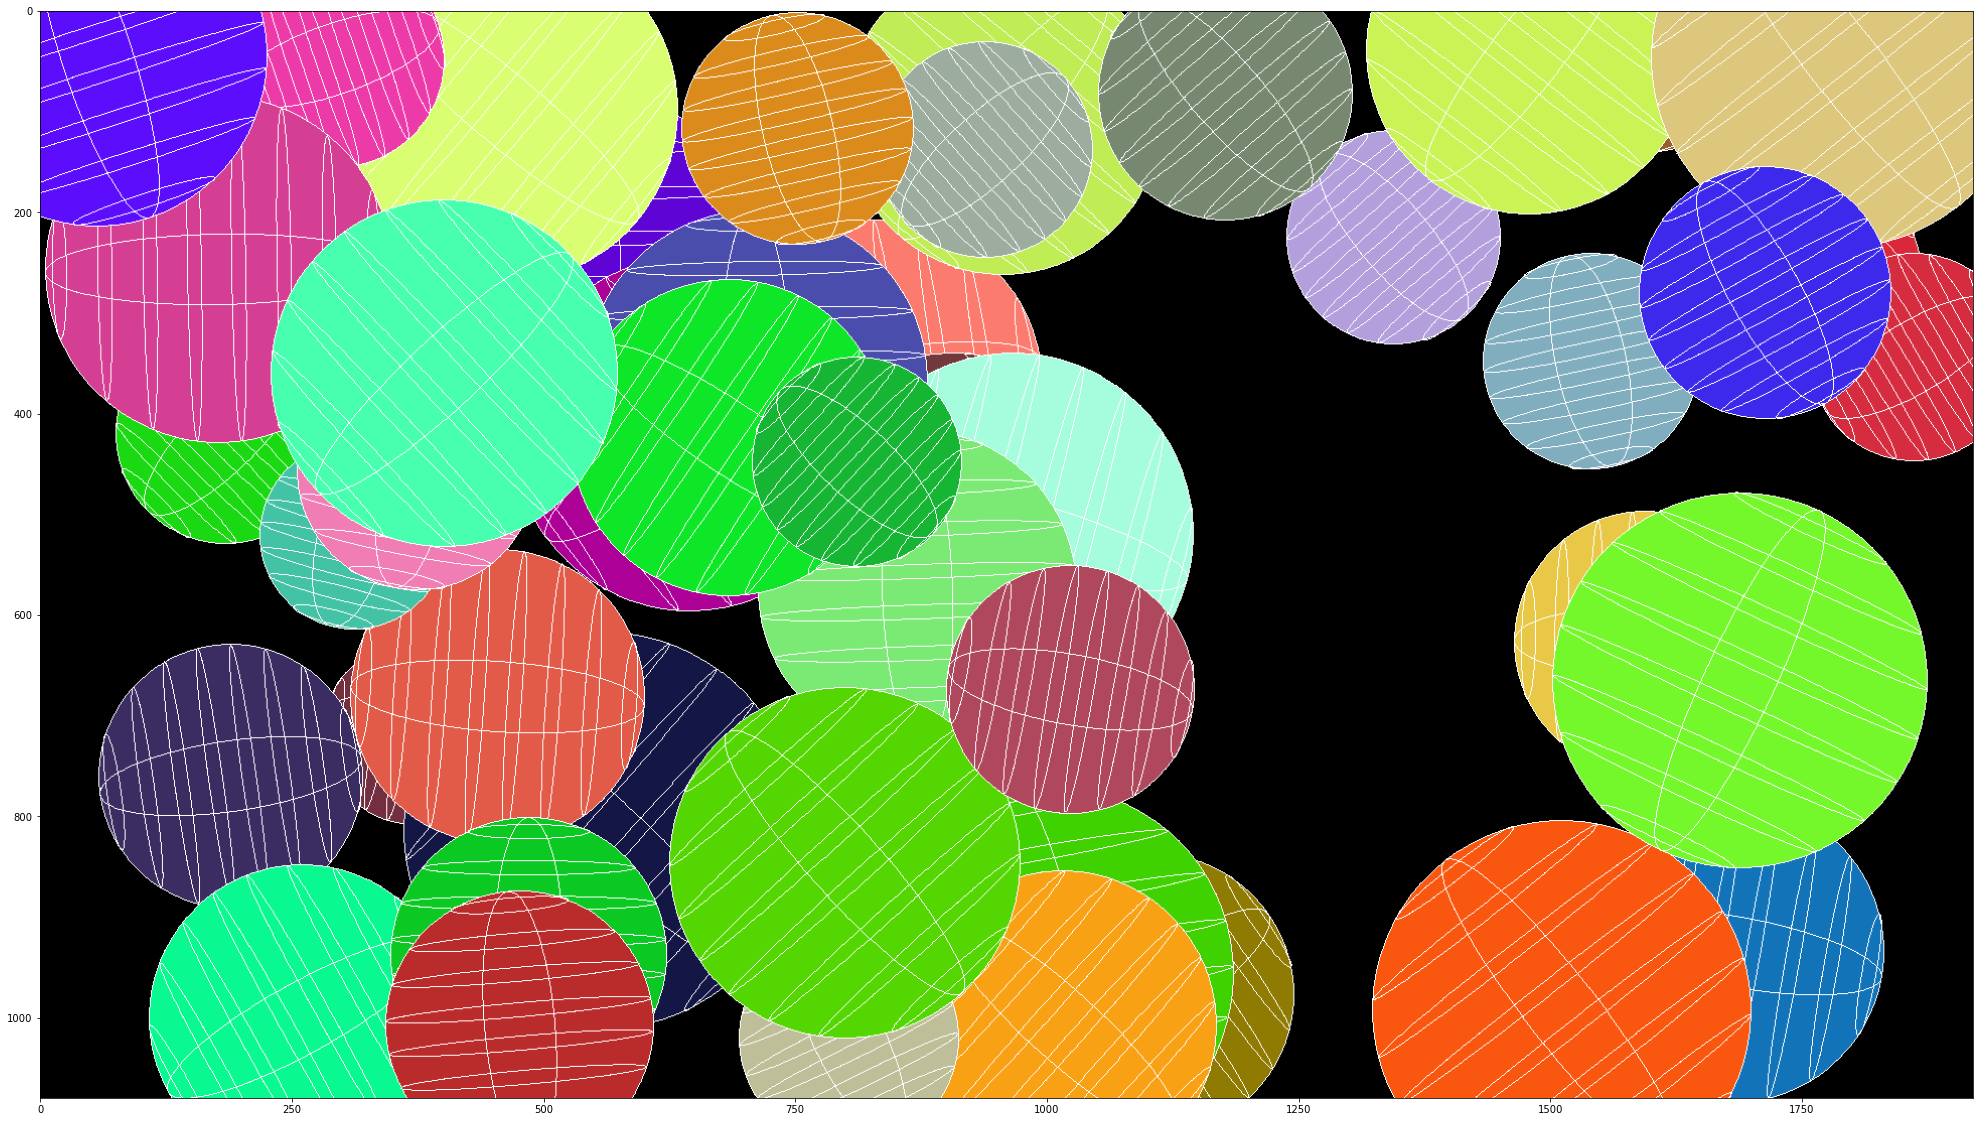

In [7]:
blank = np.zeros((1080, 1920), dtype = np.uint8)
blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)

for i in range(50):
    
    color1 = random.randint(0,255)
    color2 = random.randint(0,255)
    color3 = random.randint(0,255)
    
    minRadius = 90
    radius = random.randint(minRadius,200)
    angle = random.randint(0,360)
    
    lenght = blank.shape[1]
    width = blank.shape[0]
    step = random.randint(1,100)
    center = (random.randint(0,lenght),(random.randint(0,width)))
    
    drawSphere(blank, center = center, radius = radius, colorSphere=(color1, color2, color3), angle = angle)
    
display_img(blank)

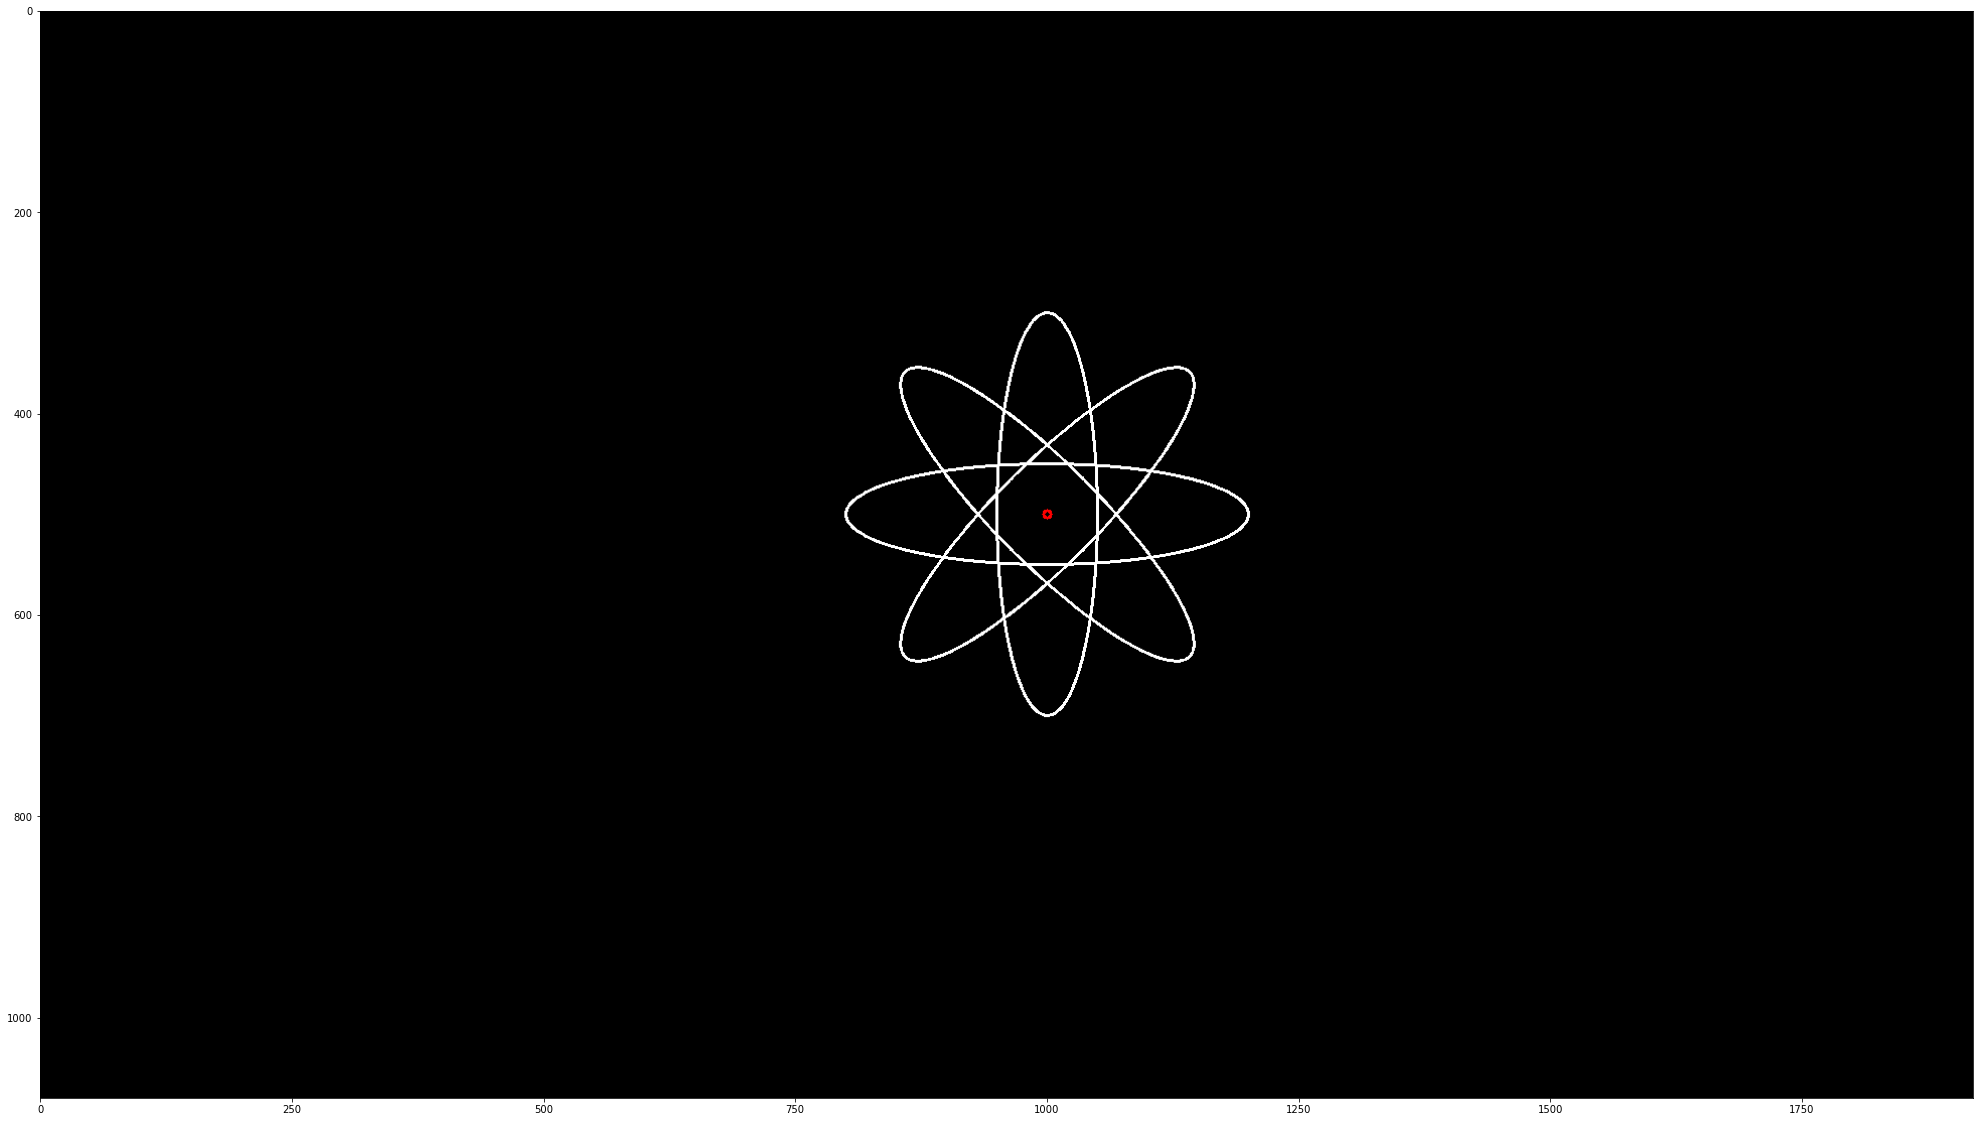

In [8]:
# atoms
blank = np.zeros((1080, 1920), dtype = np.uint8)
blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)

radius = 200
center = (1000,500)

cv2.circle(blank, center, radius = 5, color = (255, 0, 0), thickness = -1)
cv2.circle(blank, center, radius = 2, color = (0, 0, 0), thickness = -1)

cv2.ellipse(blank, center, axes = (radius,50), angle=315,
                          startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 2)
cv2.ellipse(blank, center, axes = (radius,50), angle=90,
                          startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 2)
cv2.ellipse(blank, center, axes = (radius,50), angle=180,
                          startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 2)
cv2.ellipse(blank, center, axes = (radius,50), angle=225,
                          startAngle = 0, endAngle = 360, color = (255, 255, 255), thickness = 2)

display_img(blank)

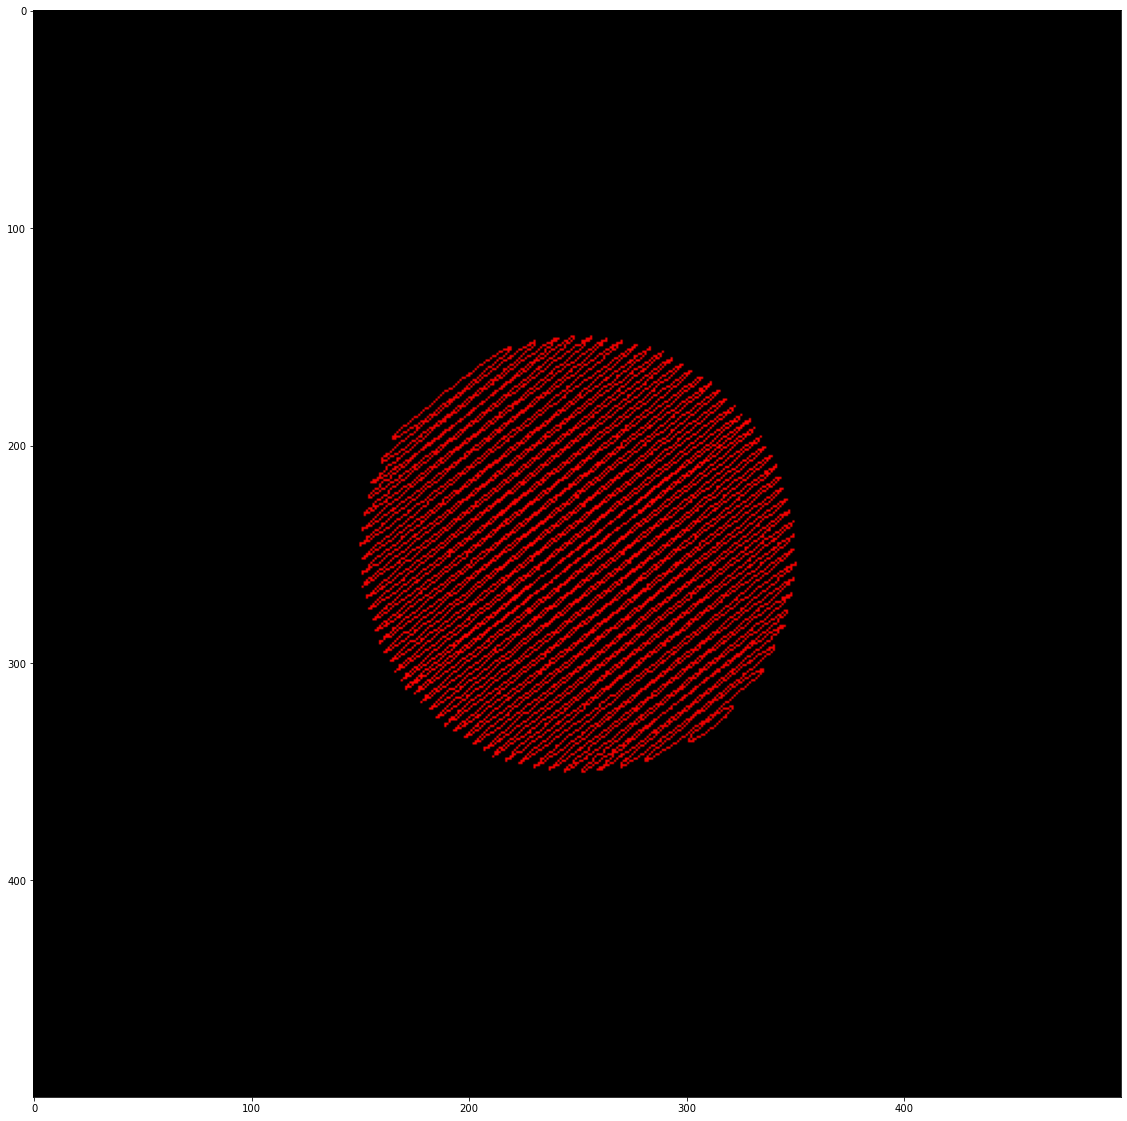

In [23]:
img = np.zeros((500,500), dtype = np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def HighQualitySphere(img, radius, colorSphere, center, angle, dobra, quality):
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gap = 5

#     cv2.circle(img, center = (center), radius = radius, color = colorSphere, thickness = -1)

    for i in range((-quality), quality, gap):

        if i > 0:
            delta_color = (i)/gap

        if i < 0:
            delta_color = -(i)/gap

        delta_cos = int(((i/quality)*radius)*np.cos(angle*np.pi/180))
        delta_sin = int(((i/quality)*radius)*np.sin(angle*np.pi/180))

        r = np.sqrt((radius**2)-(delta_cos**2)-(delta_sin**2))
        cv2.ellipse(img, (center[0] + delta_sin, center[1] - delta_cos), axes = (int(r), dobra), angle = angle,
                    startAngle = 0, endAngle = 360, color = (colorSphere[0] - delta_color, colorSphere[1]- delta_color, colorSphere[2]- delta_color), thickness = 1)
        
    return img
display_img(HighQualitySphere(img, radius = 100, center = (250,250), colorSphere=(255,0,0), angle = angle, dobra = 2, quality = 100))

In [24]:
#code to make video
size = (1000, 1000)
a = 0
b = 0
img = np.zeros(size, dtype = np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fps= 60
video_list = []

for i in range(fps*10):
    img = np.zeros(size, dtype = np.uint8)

    angle = i
    frame = HighQualitySphere(img, radius = 100, center = (500,500), colorSphere=(0,0,255), angle = angle, dobra = 5, quality = 10)

    video_list.append(frame)
        
out = cv2.VideoWriter('video.avi', cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
for i in range(len(video_list)):
    out.write(video_list[i])
out.release()    

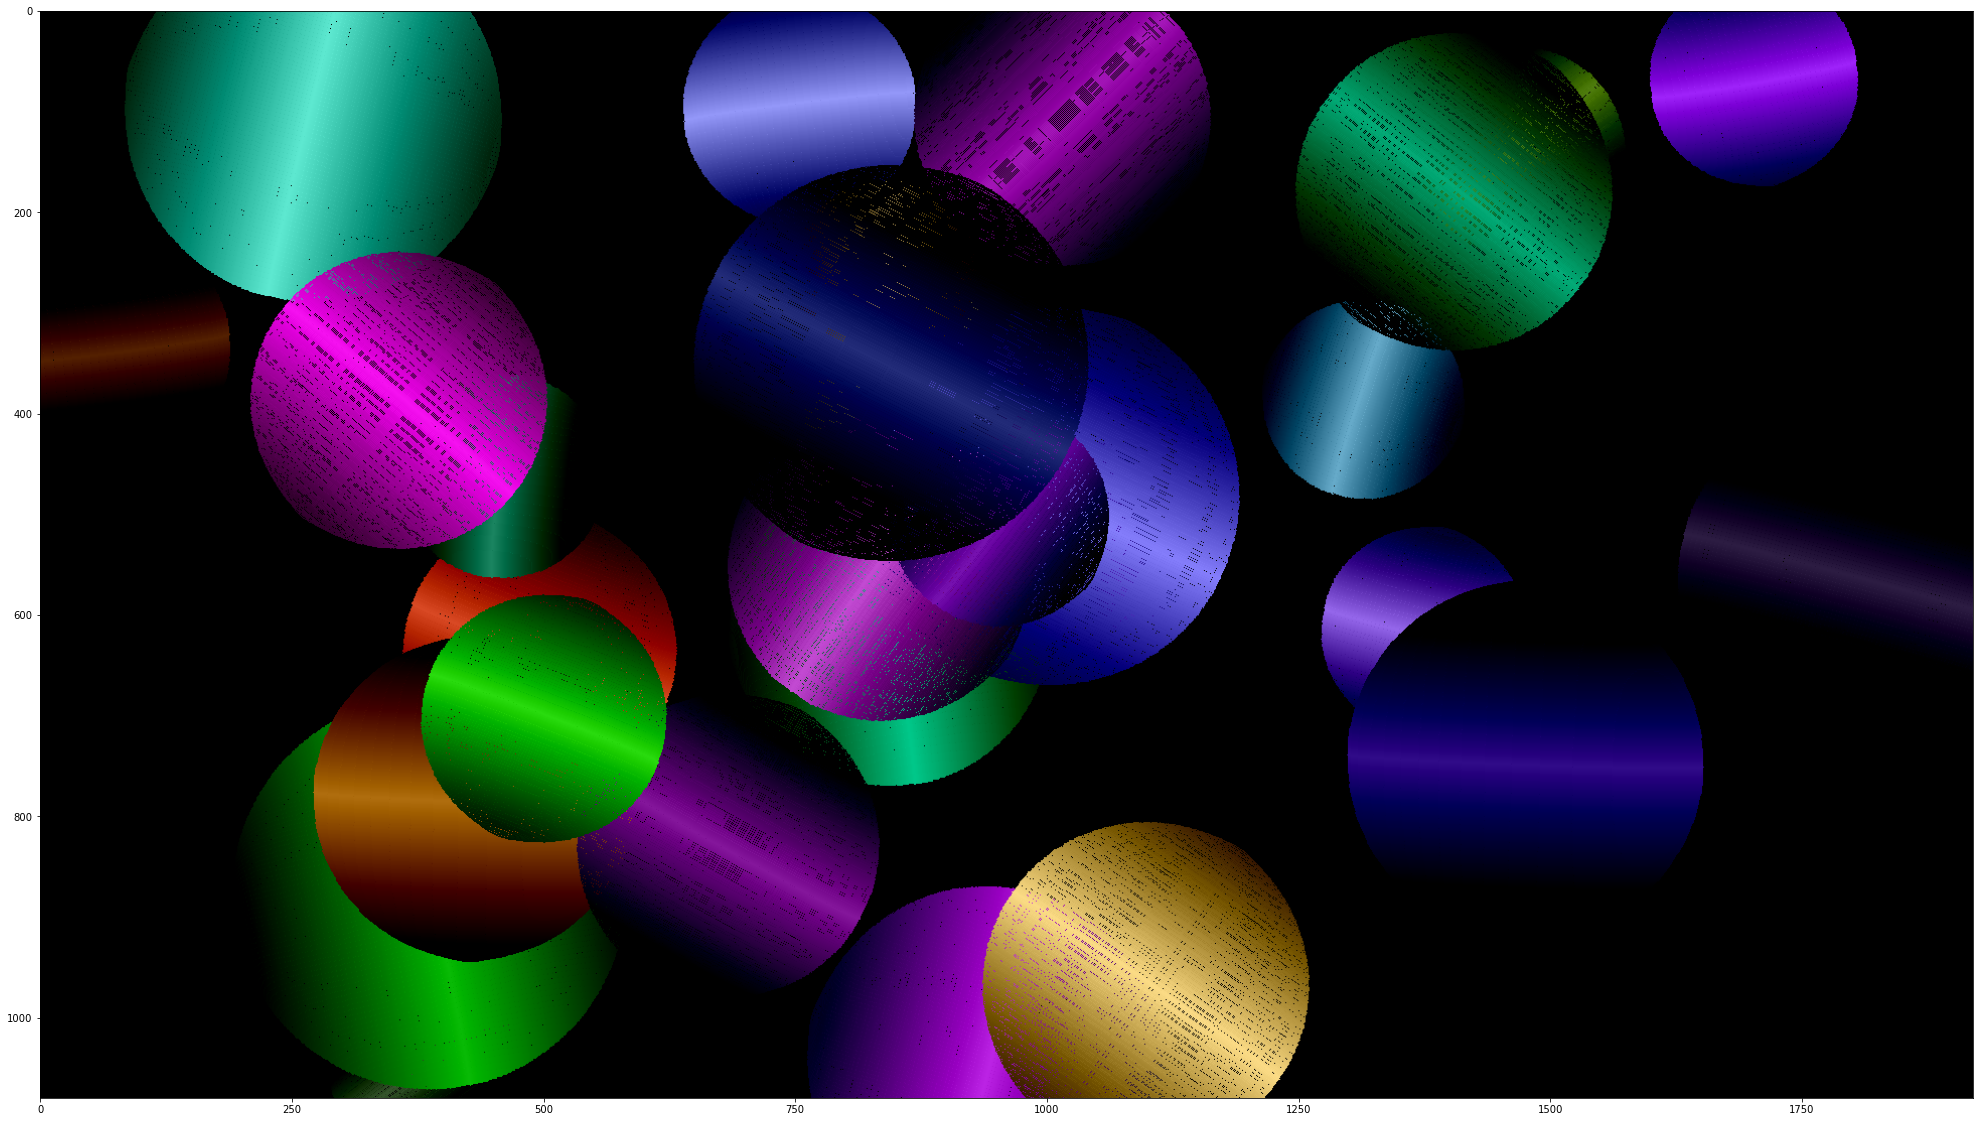

In [25]:
blank = np.zeros((1080, 1920), dtype = np.uint8)
blank = cv2.cvtColor(blank, cv2.COLOR_BGR2RGB)

for i in range(30):
    
    color1 = random.randint(0,255)
    color2 = random.randint(0,255)
    color3 = random.randint(0,255)
    
    minRadius = 90
    radius = random.randint(minRadius,200)
    angle = random.randint(0,360)
    
    lenght = blank.shape[1]
    width = blank.shape[0]
    step = random.randint(1,100)
    center = (random.randint(0,lenght),(random.randint(0,width)))
    
    blank = HighQualitySphere(blank, radius = radius, center = center, colorSphere=(color1, color2, color3), angle = angle, dobra = 4, quality = 1000)
    
display_img(blank)

In [ ]:
cv2.circle()